In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
%matplotlib inline

In [42]:
filepath = './packet_data.npy'
STARTCHUNK = 0.587 #constant that helps us isolate the specific data of the flight (done empircally)
ENDCHUNK = 0.62 #end constant to isolate

In [43]:
data = np.load(filepath) #load file
print(data.shape) # Should be 2-d (# Packets, # of Fields)
print(data.dtype) # Should be float64

(1024683, 29)
float64


In [44]:
data[0] #gives us all the packets 

array([ 4.88790000e+04,  0.00000000e+00,  4.29466724e+09,  7.99218750e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        5.83248377e+00,  7.87241602e+00, -5.24348855e-01, -5.32648480e-03,
       -7.45707843e-03, -3.19589092e-03,  3.34472626e-01,  8.56323242e-02,
       -8.98437351e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        9.99990165e-01,  2.61641596e-03, -2.02738680e-03, -3.93627561e-04,
        4.09181838e+08])

Text(0.5, 1.0, 'Time')

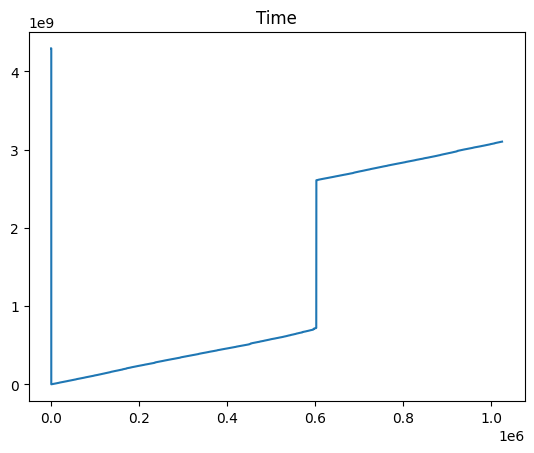

In [45]:
plt.plot(data[:,2]) #column 3
plt.title("Time")
#this is the time plot which should be linear but as you can see it spikes up out of nowhere and continues linearly
#we want to find out why but we accounted for this specific spike in the caluclatiosn ahead.

Text(0.5, 0, 'seconds')

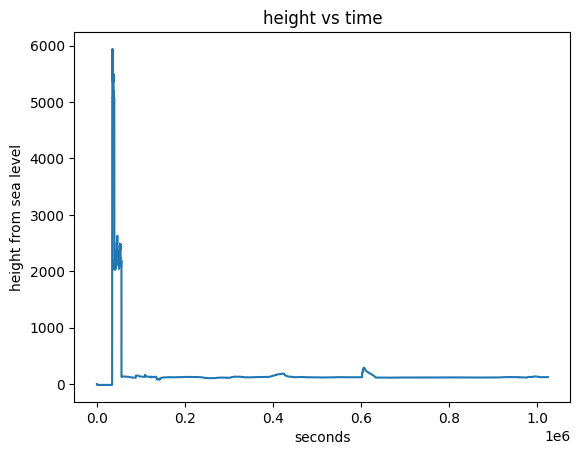

In [46]:
plt.plot(data[:,9])
plt.title("height vs time")
plt.ylabel("height from sea level")
plt.xlabel("seconds")

Text(0.5, 1.0, 'flight path')

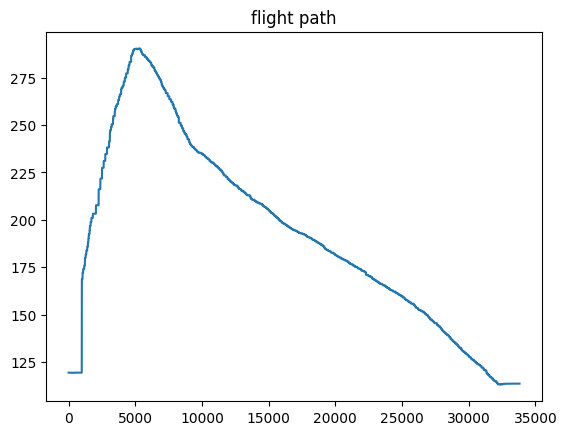

In [47]:
# Using GPS Altitude to try and narrow down the flight period
f_start = int(data.shape[0]*STARTCHUNK)
f_end = int(data.shape[0]*ENDCHUNK)
plt.plot(data[f_start:f_end,9]) #shows flight path
plt.title("flight path")

Text(0.5, 1.0, 'Thrust Curve for METRA (04-07)')

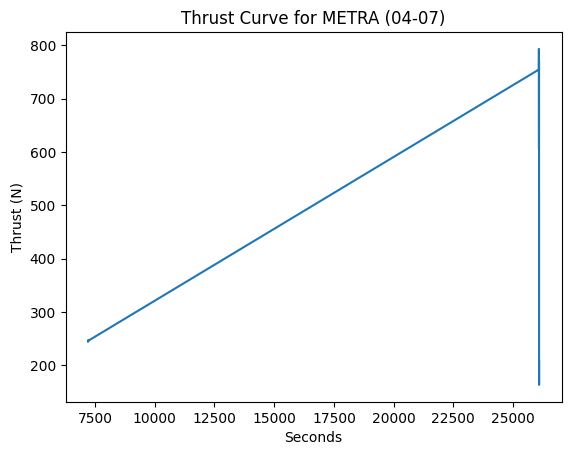

In [48]:
t_start, t_end = int(data.shape[0]*0.5879), int(data.shape[0]*0.5888) #this provides a different interval than the other? wut
plt.plot(data[t_start:t_end,2]*10e-6,(data[t_start:t_end,14]+9.81)*22.41) 
plt.xlabel('Seconds')
plt.ylabel('Thrust (N)')
plt.title('Thrust Curve for METRA (04-07)')

In [49]:
type(1887261285.0) #i thought we knew this why

float

In [50]:
type(data[t_start+1, 2]) #gonna assume t_start is 0 

numpy.float64

In [51]:
TIMEJUMP= 2608493921.0-721232636.0 #finds how much time randomly jumped in so we can calculate the real value of t 


In [59]:
#for loop to find the exact moment when the time jumped.
jumppoint= -999999
for i in range(t_end-t_start+1):
    if (data[t_start+i,2]-data[t_start+i-1,2] > TIMEJUMP-100):
        jumppoint = i #index

In [60]:
jumppoint

922

In [54]:
for i in range(t_end-t_start):#removed k because you dont use it so no need for it
    if data[t_start+i, 2] > 2608493920: #post-time jump, subtract the time jump to get the real value
         data[t_start+i, 2] = data[t_start+i, 2] - TIMEJUMP       
    print(f'i: {i} = {data[t_start+i, 2]}')

i: 0 = 721149592.0
i: 1 = 721149633.0
i: 2 = 721151380.0
i: 3 = 721154084.0
i: 4 = 721156747.0
i: 5 = 721156792.0
i: 6 = 721156833.0
i: 7 = 721156873.0
i: 8 = 721156914.0
i: 9 = 721156959.0
i: 10 = 721157000.0
i: 11 = 721157040.0
i: 12 = 721157085.0
i: 13 = 721157126.0
i: 14 = 721157166.0
i: 15 = 721157207.0
i: 16 = 721157252.0
i: 17 = 721157293.0
i: 18 = 721157333.0
i: 19 = 721157374.0
i: 20 = 721170045.0
i: 21 = 721170099.0
i: 22 = 721170140.0
i: 23 = 721170181.0
i: 24 = 721170221.0
i: 25 = 721187655.0
i: 26 = 721190853.0
i: 27 = 721190898.0
i: 28 = 721190939.0
i: 29 = 721190980.0
i: 30 = 721191106.0
i: 31 = 721191146.0
i: 32 = 721191187.0
i: 33 = 721191232.0
i: 34 = 721191273.0
i: 35 = 721191313.0
i: 36 = 721191359.0
i: 37 = 721191399.0
i: 38 = 721194248.0
i: 39 = 721197120.0
i: 40 = 721226470.0
i: 41 = 721229133.0
i: 42 = 721229179.0
i: 43 = 721229219.0
i: 44 = 721229260.0
i: 45 = 721229300.0
i: 46 = 721231968.0
i: 47 = 721232008.0
i: 48 = 721232049.0
i: 49 = 721232090.0
i: 50 = 72

In [55]:
# gonna find all the values in that row
#this is ugly
for i in range(900, 950):
        print("time at "+f'i: {i} = {data[t_start+i, 2]}') #time value 
        print("thrust at "+ f'i: {i} = {(data[t_start+i, 14]+9.81)*22.41}') #thrust force
        print("GPS height from sealevel at " + f'i: {i} = {data[t_start+i, 9]}') #sea level
        print("\n")


time at i: 900 = 722182320.0
thrust at i: 900 = 188.2923839255333
GPS height from sealevel at i: 900 = 203.27499389648438


time at i: 901 = 722182366.0
thrust at i: 901 = 188.2923839255333
GPS height from sealevel at i: 901 = 203.27499389648438


time at i: 902 = 722182406.0
thrust at i: 902 = 188.2923839255333
GPS height from sealevel at i: 902 = 203.27499389648438


time at i: 903 = 722182447.0
thrust at i: 903 = 188.2923839255333
GPS height from sealevel at i: 903 = 203.27499389648438


time at i: 904 = 722182492.0
thrust at i: 904 = 188.2923839255333
GPS height from sealevel at i: 904 = 203.27499389648438


time at i: 905 = 722182532.0
thrust at i: 905 = 188.2923839255333
GPS height from sealevel at i: 905 = 203.27499389648438


time at i: 906 = 722182573.0
thrust at i: 906 = 188.2923839255333
GPS height from sealevel at i: 906 = 203.27499389648438


time at i: 907 = 722184911.0
thrust at i: 907 = 187.9704491921425
GPS height from sealevel at i: 907 = 203.27499389648438


time at 